In [54]:
import json
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
import folium as fl
import datetime
sns.set(style="whitegrid")
%matplotlib inline
from ipywidgets import *
from ipywidgets import interact, interactive, fixed
from IPython.display import display
#from IPython.html import widgets
import ipywidgets as widgets



In [55]:
battles = pd.DataFrame([json.loads(line) for line in open("../datasets/battle-features-0.json")])
btp = battles[['start_date','casualties_1', 'casualties_2', 'dates_bc', 'end_date']]
btp = btp[pd.notnull(btp['start_date'])]
btp['casualties_total']=btp['casualties_1']+btp['casualties_2']

btpbc=btp[btp.dates_bc==True]
btpbc['year'] = [-datetime.datetime.strptime(date, "%Y-%m-%d").year for date in btpbc['start_date']]
btpnbc=btp[btp.dates_bc==False]
btpnbc['year'] = [datetime.datetime.strptime(date, "%Y-%m-%d").year for date in btpnbc['start_date']]
btp=btpbc.append(btpnbc)

bins = [-2500,-2250,-2000,-1750,-1500,-1250,-1000,-750,-500,-250,0,250,500,750,1000,1250,1500,1750,2000,2250]
bins_labels=[-2500,-2250,-2000,-1750,-1500,-1250,-1000,-750,-500,-250,0,250,500,750,1000,1250,1500,1750,2000]
casualtiesbins = [0,50,100,250, 500,1000,2000,5000,10000,50000,1000000,4000000,5000000]
casualties_labels=[0,50,100,250, 500,1000,2000,5000,10000,50000,1000000,4000000]
lengthbins = [-1,5,10,15,50,100,150,200,500,1000,2000,3000]
lengthbins_labels=[0,5,10,15,50,100,150,200,500,1000,2000]

/Users/margueritedelcourt/anaconda/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/margueritedelcourt/anaconda/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


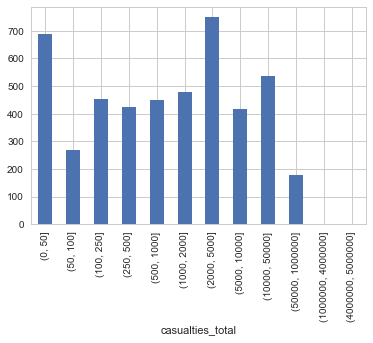

In [56]:
btpcasualties=btp.groupby(pd.cut(btp['casualties_total'], bins=casualtiesbins)).casualties_total
casualties_count = btpcasualties.count()
casualties_count.plot(kind='bar')

In [57]:
btpDP = btp.groupby(pd.cut(btp['year'],bins=bins, labels=bins_labels))[['start_date','casualties_total', 'end_date']]
  
def plotDurationByPeriod(b):
    try:
        btpnow = btpDP.get_group(b)
        casualties=btpnow.groupby(pd.cut(btpnow['casualties_total'], bins=casualtiesbins, labels=casualties_labels))['casualties_total']
        casualties_count = casualties.count()
        plt.figure(1)
        casualties_count.plot(kind='bar')
        plt.title('casualties by time interval')
    except:
        print("No battles in time interval")



In [58]:
interact(plotDurationByPeriod, b=(-2500,2000,250))

interactive(children=(IntSlider(value=-250, description='b', max=2000, min=-2500, step=250), Output()), _dom_classes=('widget-interact',))

<function __main__.plotDurationByPeriod>

In [61]:

btp['end_date']=btp['end_date'].fillna(btp['start_date'])
btp['start_date'] = btp['start_date'].astype('datetime64[ns]')
btp['end_date'] = btp['end_date'].astype('datetime64[ns]')
length=[]
btp=btp.reset_index()
for i in range(0,len(btp['start_date'])):
    #print(pd.Timedelta(btp1.end_date[i]-btp1.start_date[i]))
    length+=[pd.Timedelta(btp.end_date[i]-btp.start_date[i])]
btp['length'] = length
btp['length']=btp['length'].astype('timedelta64[D]')

btpCL = btp.groupby(pd.cut(btp['length'],bins=bins, labels=bins_labels))[['length','casualties_total']]
  
def plotCasualtiesByLength(b):
    try:
        btpnow = btpCL.get_group(b)
        casualties=btpnow.groupby(pd.cut(btpnow['casualties_total'], bins=casualtiesbins, labels=casualties_labels))['casualties_total']
        casualties_count = casualties.count()
        plt.figure(1)
        casualties_count.plot(kind='bar')
        plt.title('casualties by battle length interval')
    except:
        print("No battle casualties in length interval")




In [62]:
interact(plotCasualtiesByLength, b=lengthbins_labels)

interactive(children=(Dropdown(description='b', options=(0, 5, 10, 15, 50, 100, 150, 200, 500, 1000, 2000), value=0), Output()), _dom_classes=('widget-interact',))

<function __main__.plotCasualtiesByLength>